In [6]:
from pathlib import Path
import requests
from isce2_topsapp.solid_earth_tides import compute_solid_earth_tide_from_gunw, update_gunw_with_solid_earth_tide

In [3]:
url = 'https://grfn.asf.alaska.edu/door/download/S1-GUNW-A-R-064-tops-20210723_20210711-015001-35393N_33512N-PP-6267-v2_0_4.nc'
gunw_path = Path(url.split('/')[-1])

resp = requests.get(url)
with open(gunw_path, 'wb') as file:
    file.write(resp.content)

In [4]:
set_ds = compute_solid_earth_tide_from_gunw(gunw_path)

/mnt/leffe-data2/cmarshak/miniconda/envs/topsapp_env/lib/python3.9/site-packages/pysolid/grid.py:93: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1062`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fc = np.loadtxt(txt_file,


[(-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001)]

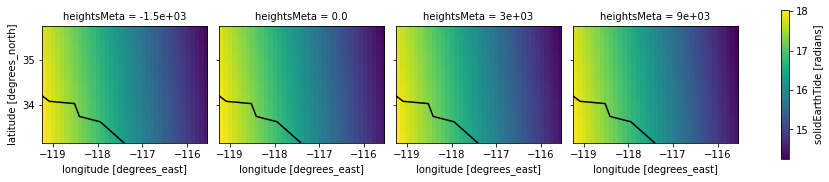

In [5]:
import geopandas as gpd
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
xmin, ymin, xmax, ymax = set_ds.rio.bounds()

s = set_ds['solidEarthTide'].plot.imshow(col='heightsMeta', 
                                         col_wrap=4, 
                                         extent=[xmin, ymin, xmax, ymax])
[df_world.boundary.plot(ax=ax, color='black') for ax in s.axes[0]]
[ax.set_ylim(ymin, ymax) for ax in s.axes[0]]
[ax.set_xlim(xmin, xmax) for ax in s.axes[0]]

In [7]:
update_gunw_with_solid_earth_tide(gunw_path)

/mnt/leffe-data2/cmarshak/miniconda/envs/topsapp_env/lib/python3.9/site-packages/pysolid/grid.py:93: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1062`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fc = np.loadtxt(txt_file,


PosixPath('S1-GUNW-A-R-064-tops-20210723_20210711-015001-35393N_33512N-PP-6267-v2_0_4.nc')